# Задание 2. Визуализация

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

Загружаем файлы .csv в pandas DataFrame.

In [5]:
balance_scale_df = pd.read_csv('data/balance_scale_preprocessed.csv')
balance_scale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Class_Name      625 non-null    int64
 1   Left-Weight     625 non-null    int64
 2   Left-Distance   625 non-null    int64
 3   Right-Weight    625 non-null    int64
 4   Right-Distance  625 non-null    int64
dtypes: int64(5)
memory usage: 24.5 KB


In [6]:
machine_df = pd.read_csv('data/machine_preprocessed.csv')
machine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Vendor_Name  209 non-null    object
 1   Model_Name   209 non-null    object
 2   MYCT         209 non-null    int64 
 3   MMIN         209 non-null    int64 
 4   MMAX         209 non-null    int64 
 5   CACH         209 non-null    int64 
 6   CHMIN        209 non-null    int64 
 7   CHMAX        209 non-null    int64 
 8   PRP          209 non-null    int64 
 9   ERP          209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


### Balance Scale Data Set 

Построим ниже столбчатую диаграмму, для того чтобы увидеть распределение шкалы баланса по классам.

<AxesSubplot:xlabel='Class_Name', ylabel='count'>

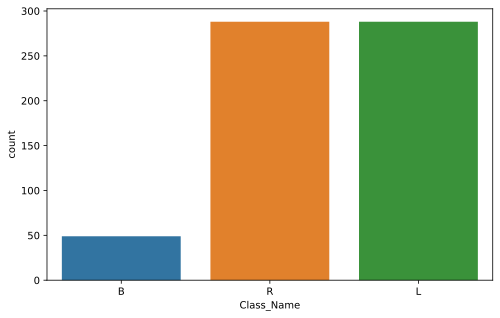

In [4]:
sns.countplot(data=balance_scale_df, x='Class_Name')

Мы видим, что в большинстве случаев шкала баланса смещена вправо или влево, причем с одинаковой частотой. Очень мало случаев, когда шкала находится в сбалансированном состоянии.

Для примера посмотрим на распределение *Left-Weight*.

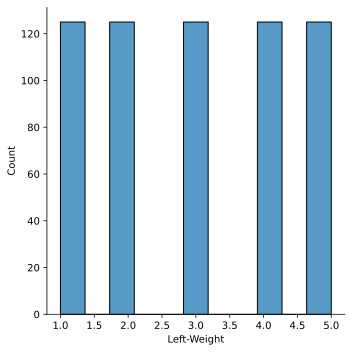

In [7]:
sns.displot(balance_scale_df['Left-Weight'])

Видим, что оно равномерное. Для *Left-Distance*, *Right-Weight*, *Right-Distance* оно будет таким же.

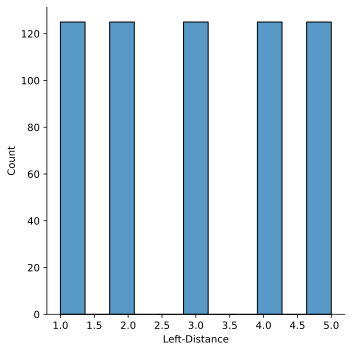

In [8]:
sns.displot(balance_scale_df['Left-Distance'])

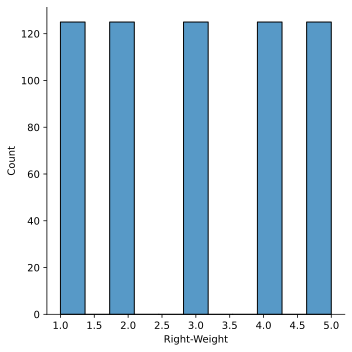

In [9]:
sns.displot(balance_scale_df['Right-Weight'])

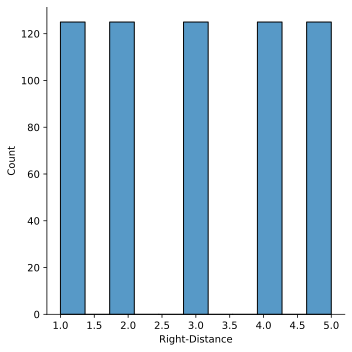

In [10]:
sns.displot(balance_scale_df['Right-Distance'])

Посмотрим, как связаны между собой различные признаки.

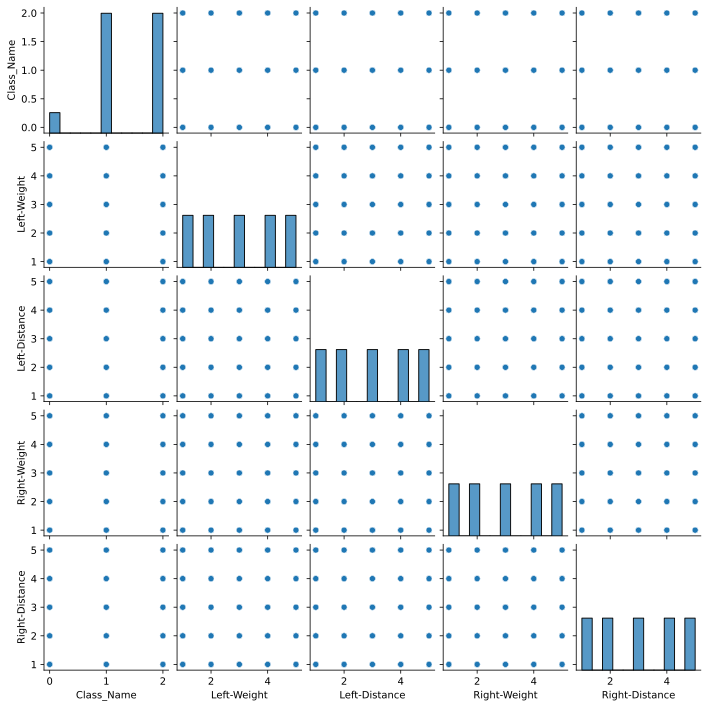

In [11]:
sns.pairplot(data=balance_scale_df, height=2.0)

<AxesSubplot:>

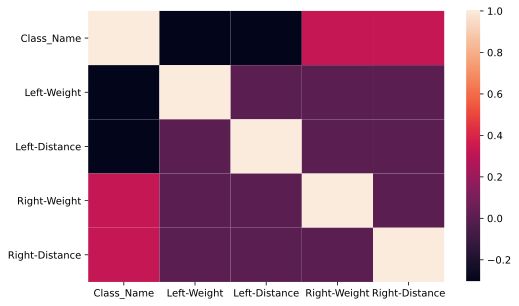

In [12]:
sns.heatmap(balance_scale_df.corr())

Вывод: Графики показывают, что все признаки одинаково коррелируют с классом, который может принимать шкала баланса.

<AxesSubplot:>

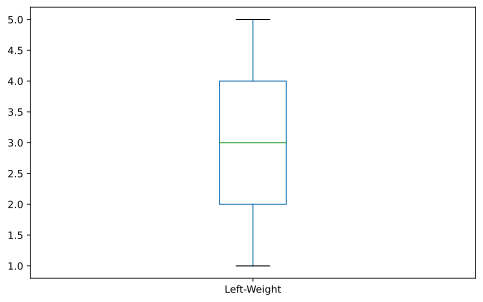

In [15]:
balance_scale_df['Left-Weight'].plot.box()

<AxesSubplot:>

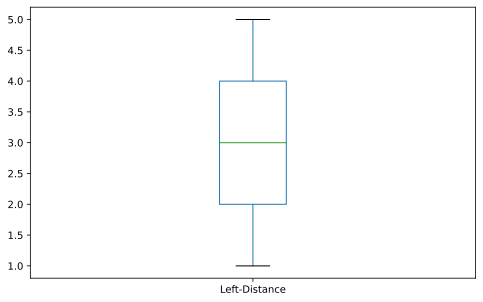

In [16]:
balance_scale_df['Left-Distance'].plot.box()

<AxesSubplot:>

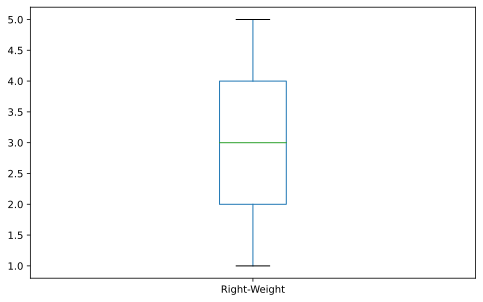

In [17]:
balance_scale_df['Right-Weight'].plot.box()

<AxesSubplot:>

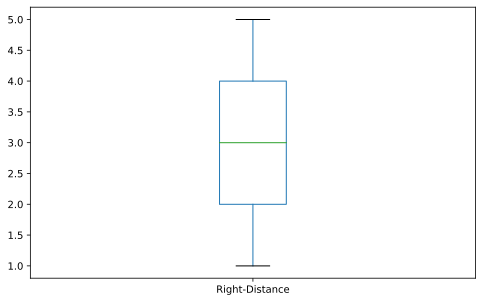

In [18]:
balance_scale_df['Right-Distance'].plot.box()

Диаграммы демонстрируют симметричное распределение показателей. В данном случае, значения квартилей и медианы точно совпадают для всех признаков.

### Computer Hardware Data Set

Построим гистограмму для того, чтобы увидеть распределение всех признаков.

array([[<AxesSubplot:title={'center':'MYCT'}>,
        <AxesSubplot:title={'center':'MMIN'}>,
        <AxesSubplot:title={'center':'MMAX'}>],
       [<AxesSubplot:title={'center':'CACH'}>,
        <AxesSubplot:title={'center':'CHMIN'}>,
        <AxesSubplot:title={'center':'CHMAX'}>],
       [<AxesSubplot:title={'center':'PRP'}>,
        <AxesSubplot:title={'center':'ERP'}>, <AxesSubplot:>]],
      dtype=object)

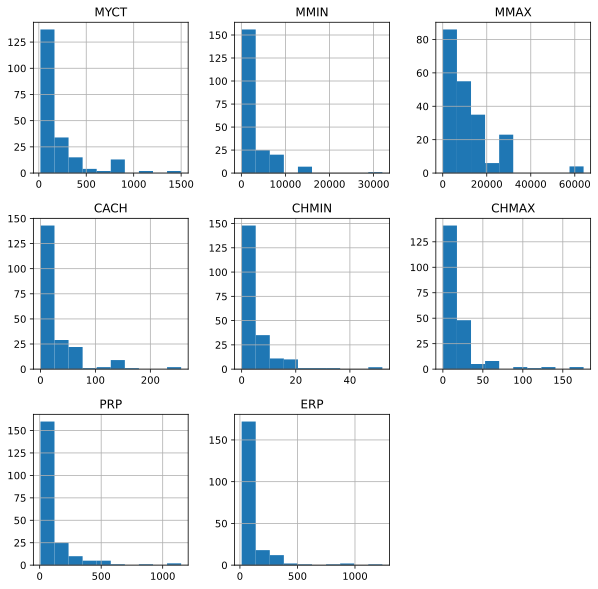

In [21]:
machine_df.hist(figsize=(10,10))

На всех гистограммах распределение существенно скошено вправо.

Посмотрим, как связаны между собой различные признаки.

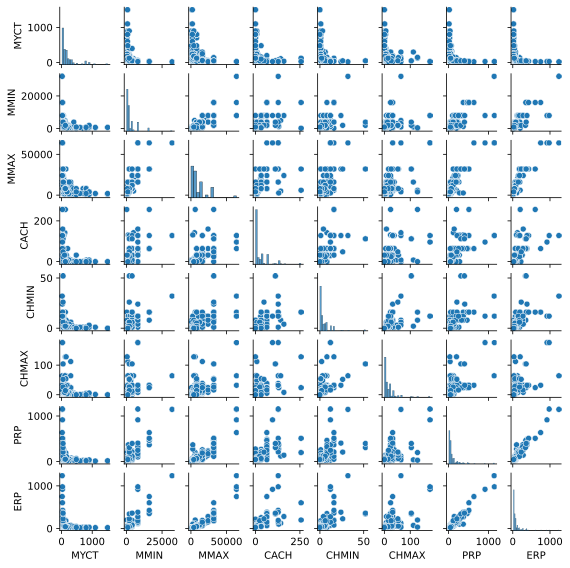

In [25]:
sns.pairplot(data=machine_df, height=1.0)

Можно сделать вывод, что *PRP* и *ERP* имеют линейную зависимость (по мере того, как публикуемая относительная производительность процессора увеличивается, увеличивается и оценочная относительная производительность процессора).

<AxesSubplot:>

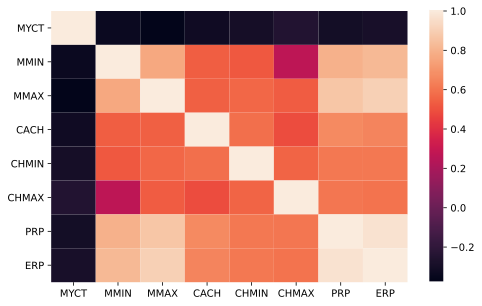

In [26]:
sns.heatmap(machine_df.corr())

Поcкольку *PRP* и *ERP* имеют линейную зависимость, между этими двумя переменными существует сильная корреляция.

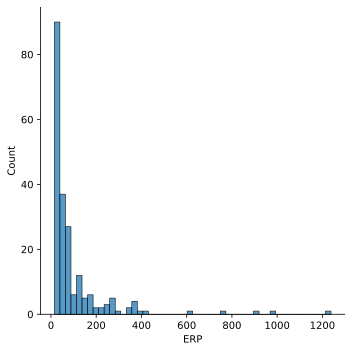

In [32]:
sns.displot(machine_df['ERP'])

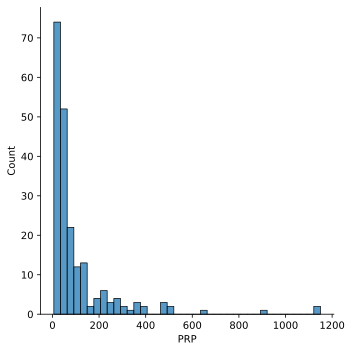

In [34]:
sns.displot(machine_df['PRP'])

Имеется достаточно много низких оценок производительности процессоров.

Посмотрим на публикуемую относительную производительность процессора и оценочную относительную производительность процессора для самых известных вендоров.

<AxesSubplot:xlabel='ERP', ylabel='Vendor_Name'>

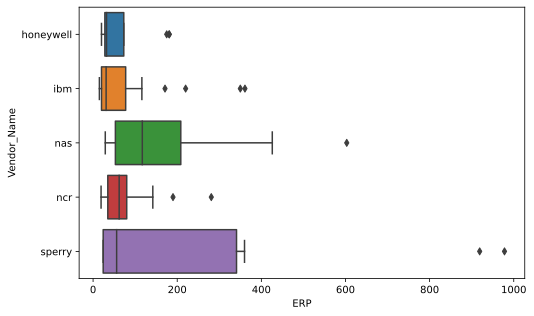

In [36]:
top_vendors = machine_df['Vendor_Name'].value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(y='Vendor_Name', x='ERP', data=machine_df[machine_df['Vendor_Name'].isin(top_vendors)], orient="h")

<AxesSubplot:xlabel='PRP', ylabel='Vendor_Name'>

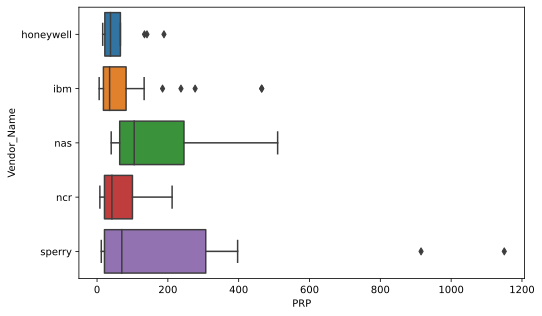

In [37]:
sns.boxplot(y='Vendor_Name', x='PRP', data=machine_df[machine_df['Vendor_Name'].isin(top_vendors)], orient="h")

Диаграммы демонстрируют несимметричное распределение показателей. Как видно из диаграмм, большее значение интерквартильного размаха и отклонения имеют данные о публикуемой и оценочной относительной производительности процессоров вендора *sperry*.